In [1]:
import rdkit
import random
import numpy as np
from rdkit import Chem

from rdkit.Chem import AllChem, Draw
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from rdkit.Chem.rdMolHash import MolHash, HashFunction
from rdkit.Chem.BRICS import BreakBRICSBonds
from rdkit.Chem.rdchem import EditableMol, BondType

from IPython.display import display
from itertools import combinations, repeat
from copy import deepcopy

from RandMol import PrepMolFrags, RandAssemFrags, \
    MakeMolFragDict, DrawMolFragDict, CreatePathStateDict, \
    ReportPathDict, GenRandPath

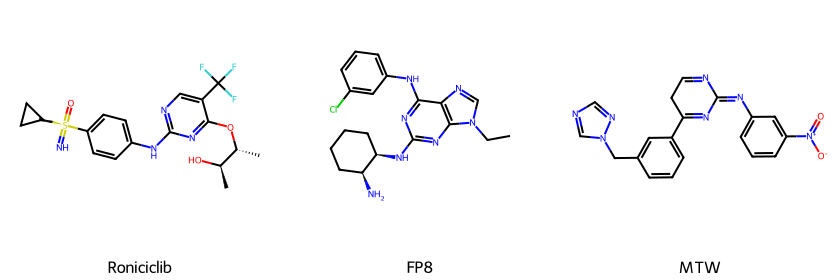

In [2]:
roni_smi = 'C[C@H]([C@@H](C)OC1=NC(=NC=C1C(F)(F)F)NC2=CC=C(C=C2)[S@](=N)(=O)C3CC3)O'
roni = Chem.MolFromSmiles(roni_smi)

fp8_smi = "CCn1cnc2c1nc(nc2Nc3cccc(c3)Cl)N[C@@H]4CCCC[C@@H]4N"
fp8 = Chem.MolFromSmiles(fp8_smi)

mtw_smi = "c1cc(cc(c1)C2=N/C(=N\c3cccc(c3)[N+](=O)[O-])/N=CC2)Cn4cncn4"
mtw = Chem.MolFromSmiles(mtw_smi)

Draw.MolsToGridImage([roni,fp8,mtw], 
                     legends = ['Roniciclib','FP8','MTW'], 
                     useSVG = True,
                     subImgSize = (280,280))

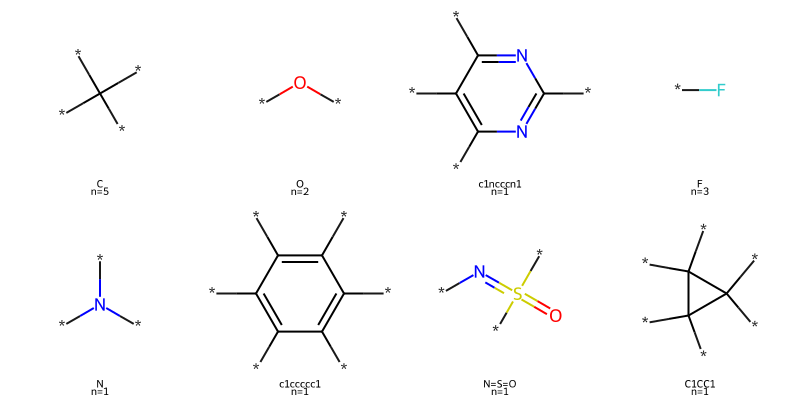

In [4]:
mol_frags = PrepMolFrags(roni)
frag_dict = MakeMolFragDict(mol_frags)
DrawMolFragDict(frag_dict, molsPerRow = 4, subImgSize = (200,200), useSVG=True)

In [6]:
ron_frag_im = DrawMolFragDict(frag_dict, molsPerRow = 4, subImgSize = (200,200))

In [7]:
with open('roni_frags.png','wb') as png:
    png.write(ron_frag_im.data)

In [9]:
rand_mols = []
for i in range(100):
    rand_mols.append(RandAssemFrags(frag_dict, False))

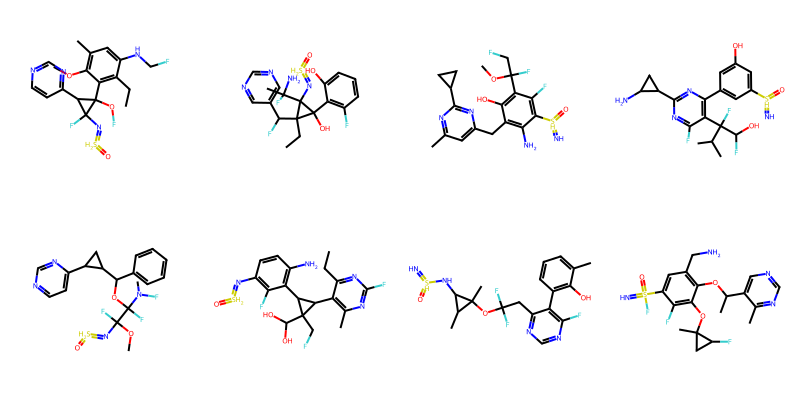

In [10]:
Draw.MolsToGridImage(rand_mols[:8], molsPerRow = 4, useSVG=True)

In [11]:
path_state_dict = CreatePathStateDict(roni, fp8)

In [12]:
ed_mol = Chem.RWMol(roni)

In [13]:
ed_frag = Chem.RWMol(frag_dict['*F']['mol'])

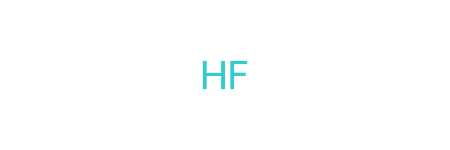

In [14]:
for a in ed_frag.GetAtoms():
    if a.GetSymbol() == '*':
        ed_frag.ReplaceAtom(a.GetIdx(), Chem.Atom(1))
AllChem.RemoveHs(ed_frag)

In [15]:
ed_frag.RemoveAtom(1)

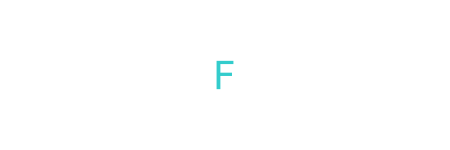

In [16]:
ed_frag

In [17]:
ed_mol.GetSubstructMatches(ed_frag)

((12,), (13,), (14,))

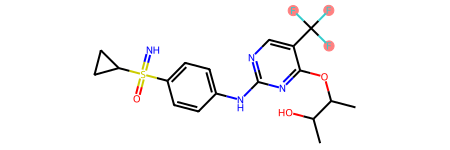

In [18]:
ed_mol

In [20]:
rand_path = GenRandPath(path_state_dict)

In [22]:
rand_path2 = GenRandPath(path_state_dict)

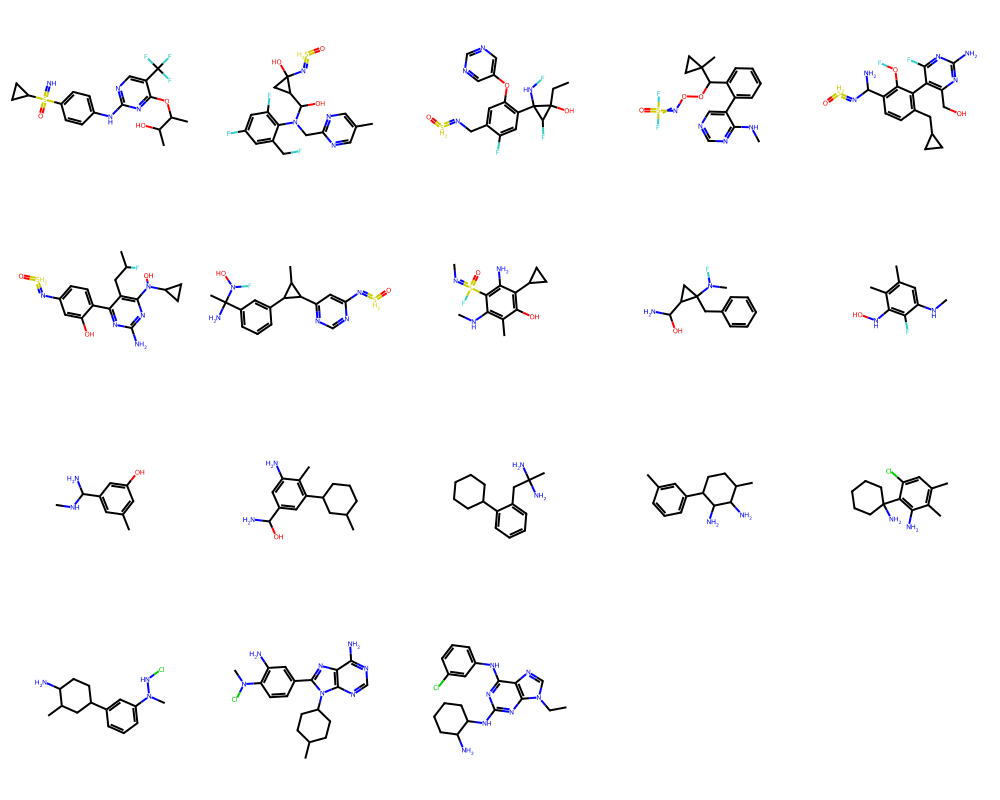

In [21]:
Draw.MolsToGridImage(
    [roni]+[rand_path[i]['mols'][0] for i in range(16)]+[fp8], 
    molsPerRow = 5, 
    useSVG = True
)

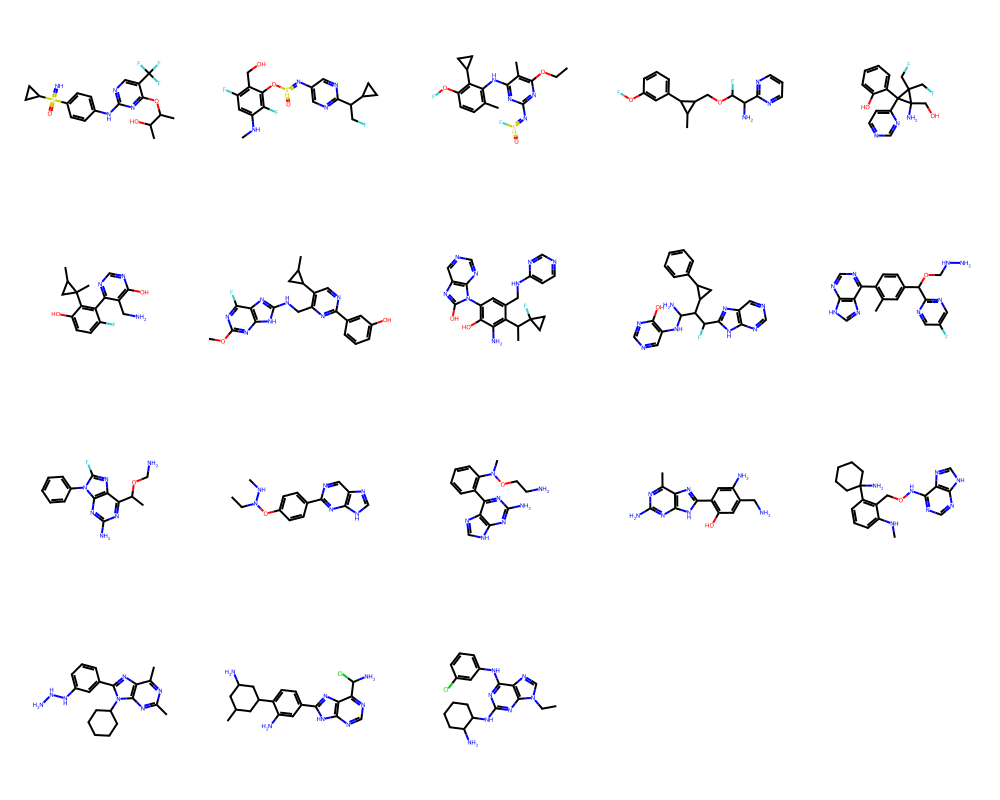

In [23]:
Draw.MolsToGridImage(
    [roni]+[rand_path2[i]['mols'][0] for i in range(16)]+[fp8], 
    molsPerRow = 5, 
    useSVG = True
)